<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/Lasso_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lasso

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing, linear_model
import sklearn
sklearn.__version__

'1.4.2'

Housing Data (ボストンの家の価格（不動産）のデータ)

課題：1970年代のボストン郊外地域の不動産物件に関するデータ．次の13個の属性を元にして，その地域の平均物件価格を予測する．

説明変数：13個

・CRIM--犯罪発生率（人口単位）
・ZN--25,000平方フィート以上の住宅区画の割合
・INDUS--非小売業の土地面積の割合（人口単位）
・CHAS--チャールズ川沿いかどうか（1:Yes、0:No）
・NOX--窒素酸化物の濃度（pphm単位）
・RM--1戸あたりの平均部屋数
・AGE--1940年よりも前に建てられた家屋の割合
・DIS--ボストンの主な5つの雇用圏までの重み付き距離
・RAD--幹線道路へのアクセス指数
・TAX--10,000ドルあたりの所得税率
・PTRATIO--教師あたりの生徒の数（人口単位）
・B-黒人居住者の割合（人口単位）
・LSTAT--低所得者の割合



In [8]:
# Read Housing Data
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#X_rm=df[['RM']].values
X=df.iloc[:, 0:13]
Y=df['MEDV'].values

# Normalization of Data
sc=preprocessing.StandardScaler()
sc.fit(X)
X=sc.transform(X)

# Split Data into Trainig Samples and Test Samples
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.5, random_state=0)
print(X_train.shape)
print(Y_train.shape)
print('X_train\n', X_train)
print('Y_train\n', Y_train)
print('X_test\n', X_test)
print('Y_test\n', Y_test)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kurita\AppData\Local\Temp\ipykernel_13796\3912346702.py:2: SyntaxWarning: invalid escape sequence '\s'
  df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')


(253, 13)
(253,)
X_train
 [[-0.35356906 -0.48772236 -0.72032214 ... -0.48803915  0.32055363
  -1.4273985 ]
 [-0.3821352  -0.48772236  1.56899549 ...  1.26893833  0.35103455
   0.33318422]
 [-0.28648804 -0.48772236 -0.43725801 ...  1.17646583  0.02298095
   0.79856118]
 ...
 [-0.40294739 -0.48772236 -0.16440754 ... -0.30309415  0.41484712
  -0.32983778]
 [-0.39383653 -0.48772236 -0.61672651 ... -0.2568579   0.3954402
   0.86163938]
 [-0.40432525 -0.48772236 -1.03402724 ... -0.85792914  0.44105193
   0.28552513]]
Y_train
 [41.7 18.4 13.1 25.  21.2 16.  34.9 25.2 24.8 21.5 23.4 18.9 10.8 21.
 27.5 17.5 13.5 28.7 14.8 19.1 28.6 13.1 19.  11.3 13.3 22.4 20.1 18.2
 22.9 20.6 25.  12.8 34.9 23.7 50.  29.  30.1 22.  15.6 23.3 30.1 14.3
 22.8 50.  20.8  6.3 34.9 32.4 19.9 20.3 17.8 23.1 20.4 23.2  7.  16.8
 46.7 50.  22.9 23.9 21.4 21.7 15.4 15.3 23.1 23.9 19.4 11.9 17.8 31.5
 33.8 20.8 19.8 22.4  5.  24.5 19.4 15.1 18.2 19.3 27.1 20.7 37.6 11.7
 33.4 30.1 21.4 45.4 20.1 20.8 26.4 10.4 21.8 32.

In [9]:
# Linear Regression
clf = linear_model.LinearRegression()
clf.fit(X_train, Y_train)

print("Coef. of Linear Regression")
print(clf.intercept_) 
print(clf.coef_) 

# Test Accuracy
Y_pred=clf.predict(X_test)
RMS=np.mean((Y_pred - Y_test) ** 2)
print("R^2 of Linear Regression:  ", clf.score(X_train, Y_train))
print("MSE of Test Samples by Linear Regression: ", RMS)

# Ridge Regression
clf_ridge= linear_model.Ridge(alpha=50.0)
clf_ridge.fit(X_train, Y_train)

print("\nCoef. of Ridge Regression")
print(clf_ridge.intercept_) 
print(clf_ridge.coef_) 

Y_ridge_pred=clf_ridge.predict(X_test)
RMS_ridge=np.mean((Y_ridge_pred - Y_test) ** 2)
print("R^2 of Ridge Regression: ", clf_ridge.score(X_train, Y_train))
print("MSE of Test Samples by Ridge Regression: ", RMS_ridge)

# Lasso
clf_lasso= linear_model.Lasso(alpha=0.5)
clf_lasso.fit(X_train, Y_train)

print("\nCoef. of Lasso")
print(clf_lasso.intercept_) 
print(clf_lasso.coef_) 

Y_lasso_pred=clf_lasso.predict(X_test)
RMS_lasso=np.mean((Y_lasso_pred - Y_test) ** 2)
print("R^2 of Lasso: ", clf_lasso.score(X_train, Y_train))
print("MSE of Test Samples by Lasso: ", RMS_lasso)


Coef. of Linear Regression
22.64412344113058
[-1.05434084  1.34399171  0.50856781  0.8600616  -1.91462375  2.51098915
 -0.08381021 -3.27660143  2.17551714 -1.63967633 -2.43375784  0.62481843
 -4.22625719]
R^2 of Linear Regression:   0.7877808902724839
MSE of Test Samples by Linear Regression:  25.30166176584627

Coef. of Ridge Regression
22.71100435267356
[-0.87031158  0.86577396 -0.21847155  0.89719884 -0.74787925  2.80599646
 -0.23104336 -1.79791203  0.57940725 -0.45525613 -2.00328983  0.60209862
 -3.23018681]
R^2 of Ridge Regression:  0.7693859663264999
MSE of Test Samples by Ridge Regression:  25.611086383588894

Coef. of Lasso
22.806637801325476
[-0.33789045  0.0230495  -0.          0.62324363 -0.          2.93035727
 -0.         -0.35165643 -0.         -0.         -2.10338901  0.01810736
 -4.06136124]
R^2 of Lasso:  0.7449487404393084
MSE of Test Samples by Lasso:  28.137668154268397


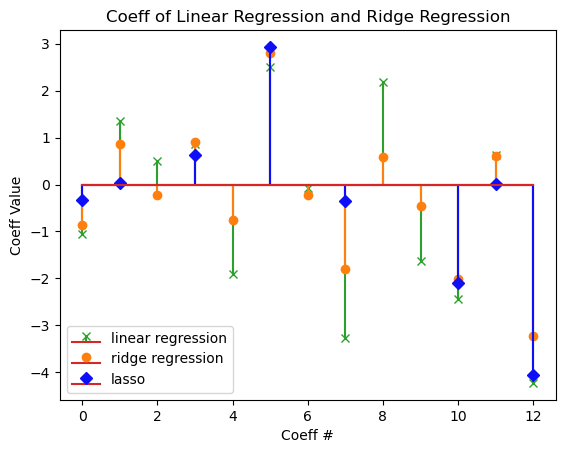

In [10]:
# Plot coefficinets of Linear Regression
m, s, _ = plt.stem(np.where(clf.coef_)[0], clf.coef_[clf.coef_ != 0], label='linear regression',
         markerfmt='gx')#, use_line_collection=True)
plt.setp([m, s], color="#2ca02c")
#plt.legend(loc='best')
#plt.title("Coeff of Linear Regression and Ridge Regression")
#plt.show()

# Plot coefficinets of Ridge Regression
m, s, _ = plt.stem(np.where(clf_ridge.coef_)[0], clf_ridge.coef_[clf_ridge.coef_ != 0], label='ridge regression',
         markerfmt='ro')#, use_line_collection=True)
plt.setp([m, s], color='#ff7f0e')

# Plot coefficinets of Ridge Regression
m, s, _ = plt.stem(np.where(clf_lasso.coef_)[0], clf_lasso.coef_[clf_lasso.coef_ != 0], label='lasso',
         markerfmt='bD')#, use_line_collection=True)
plt.setp([m, s], color='#0e0ef7')

plt.legend(loc='best')
plt.xlabel("Coeff #")
plt.ylabel("Coeff Value")
plt.title("Coeff of Linear Regression and Ridge Regression")
plt.savefig('Lasso_House_Coeff.png')
plt.show()